# Hybrid algorithm. Parameter investigation. Evaluation

Base settings: <br/>
1. #of items total = 1000
2. baseline_items = 20
3. LR = 5
4. machine_selection_confidence = 0.95
5. mahine_tests_num = 50
5. Nt = 5
6. J = 3
7. Proportion "IN" items = 0.3
8. #of filters = 4
9. thrsh for "OUT" = 0.90 (for all algorithms regardless LR)
10. corr calues in [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
11. machine acuracies is in 0.5-0.95
12.results are averaged by 10 repetitions


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# ![alt text](imagename.png "Title")

In [3]:
def plot_chart(data, title):
    fig, ax = plt.subplots(figsize=(10,8))
    colors = ['blue', 'blue', 'red', 'red', 'green', 'green']
    algos = ['Machines-Ensemble', 'Hybrid-Ensemble', 'Crowd-Ensemble']
    ax.set_color_cycle(colors)

    markers = ['.', '*', '^']
    def plot_alg(data, alg, marker):
        y = data.loc[(data['alg'] == alg)]['loss_mean'].values
        x = data.loc[(data['alg'] == alg)]['price_mean'].values
        err = data.loc[(data['alg'] == alg)]['loss_std'].values
        plt.plot(x, y, label=alg, marker=marker)
        plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1)

    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker)
    plt.title(title, size=30)
    plt.xlabel('Price (avg number of votes per item)', size=25)
    plt.ylabel('Loss', size=25)
    plt.legend(fontsize = 25)
    plt.grid()

# 1. Chart: Base settings

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


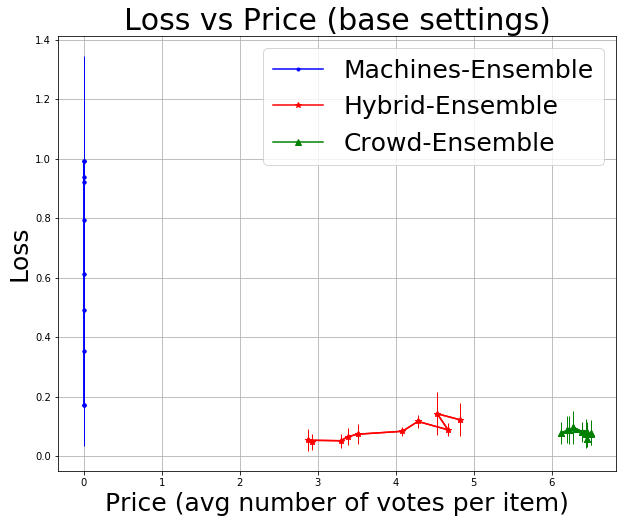

In [4]:
data = pd.read_csv('../output/data/fig0_base_settings.csv')
title = 'Loss vs Price (base settings)'

plot_chart(data, title)

# 2. Chart: Base settings (results are averaged by 50 repetitions)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


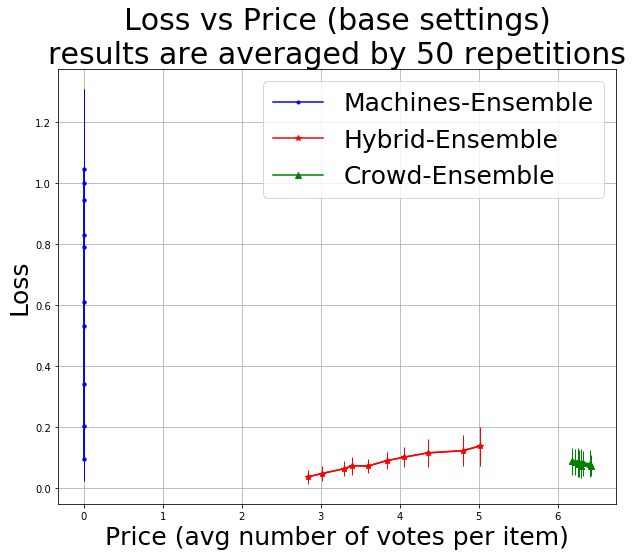

In [5]:
data = pd.read_csv('../output/data/fig0_0_base_settings_50itr.csv')
title = 'Loss vs Price (base settings)\nresults are averaged by 50 repetitions'

plot_chart(data, title)

# 3. Chart: (#of items=5000)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


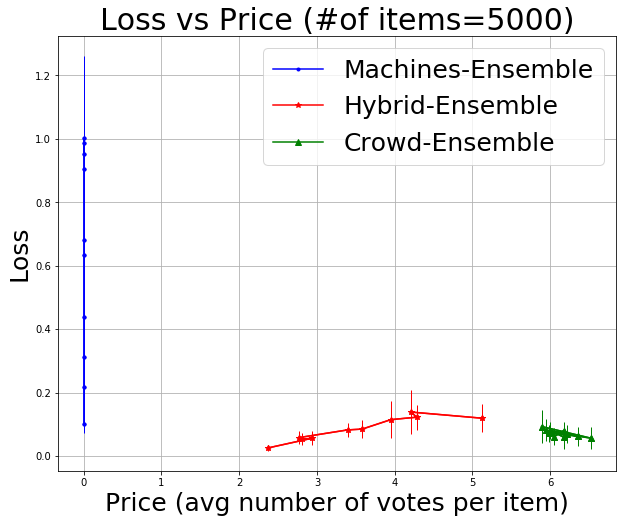

In [6]:
data = pd.read_csv('../output/data/fig1_total_items.csv')
title = 'Loss vs Price (#of items=5000)'

plot_chart(data, title)

# 4. Chart: (#of baseline_items=50)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


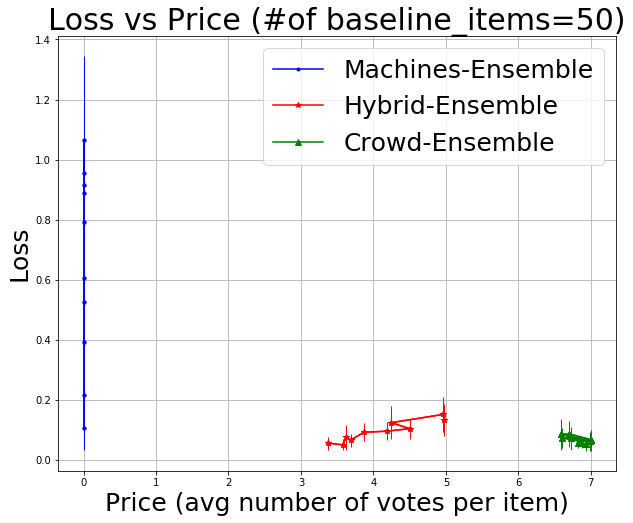

In [17]:
data = pd.read_csv('../output/data/fig2_baseline_items.csv')
title = 'Loss vs Price (#of baseline_items=50)'

plot_chart(data, title)

# 5. Chart: (Vary #of tests for machines)

#of tests for machines = [ 15,  20,  30,  40,  50, 100, 150, 200, 500]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


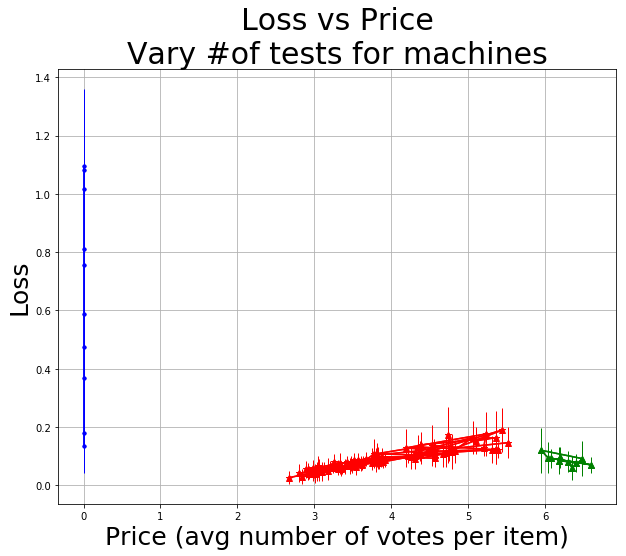

In [19]:
data = pd.read_csv('../output/data/fig4_tests_num.csv')

fig, ax = plt.subplots(figsize=(10,8))
colors = ['blue', 'blue', 'green', 'green']
algos = ['Machines-Ensemble', 'Crowd-Ensemble']
ax.set_color_cycle(colors)

markers = ['.', '^']
def plot_alg(data, alg, marker):
    y = data.loc[(data['alg'] == alg) & (data['tests_num'] == 50)]['loss_mean'].values
    x = data.loc[(data['alg'] == alg) & (data['tests_num'] == 50)]['price_mean'].values
    err = data.loc[(data['alg'] == alg) & (data['tests_num'] == 50)]['loss_std'].values
    plt.plot(x, y, label=alg, marker=marker)
    plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1)

for alg, marker in zip(algos, markers):
    plot_alg(data, alg, marker)

tests_num = data['tests_num'].unique()
ax.set_color_cycle(['red'])
for t in tests_num:
    y = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['tests_num'] == t)]['loss_mean'].values
    x = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['tests_num'] == t)]['price_mean'].values
    err = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['tests_num'] == t)]['loss_std'].values
    plt.plot(x, y, label=alg, marker='*')
    plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1)

plt.title('Loss vs Price\nVary #of tests for machines', size=30)
plt.xlabel('Price (avg number of votes per item)', size=25)
plt.ylabel('Loss', size=25)
# plt.legend(fontsize = 25)
plt.grid()

# 6. Chart: (Vary LR)

LR = [1, 5, 10, 20, 50, 100]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


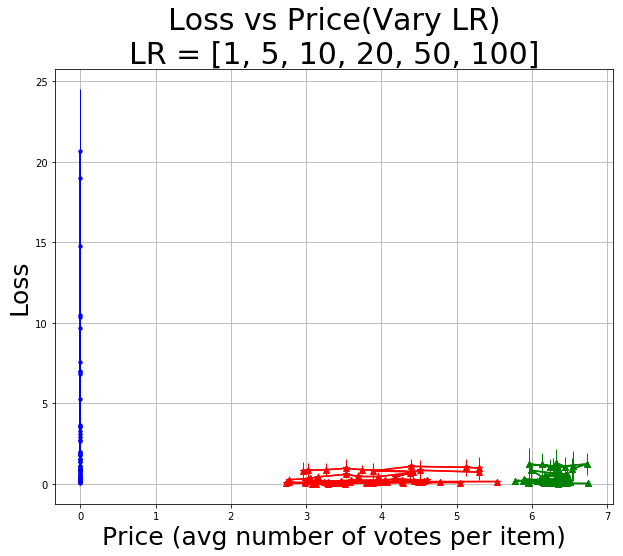

In [20]:
data = pd.read_csv('../output/data/fig3_lr.csv')

fig, ax = plt.subplots(figsize=(10,8))
colors = ['blue', 'blue', 'green', 'green']
algos = ['Machines-Ensemble', 'Crowd-Ensemble']
ax.set_color_cycle(colors)

markers = ['.', '^']
def plot_alg(data, alg, marker):
    y = data.loc[(data['alg'] == alg)]['loss_mean'].values
    x = data.loc[(data['alg'] == alg)]['price_mean'].values
    err = data.loc[(data['alg'] == alg)]['loss_std'].values
    plt.plot(x, y, label=alg, marker=marker)
    plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1)

for alg, marker in zip(algos, markers):
    plot_alg(data, alg, marker)

lr_list = data['lr'].unique()
ax.set_color_cycle(['red'])
for lr in lr_list:
    y = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['lr'] == lr)]['loss_mean'].values
    x = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['lr'] == lr)]['price_mean'].values
    err = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['lr'] == lr)]['loss_std'].values
    plt.plot(x, y, label=alg, marker='*')
    plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1)

plt.title('Loss vs Price(Vary LR)\nLR = [1, 5, 10, 20, 50, 100]', size=30)
plt.xlabel('Price (avg number of votes per item)', size=25)
plt.ylabel('Loss', size=25)
# plt.legend(fontsize = 25)
plt.grid()

# 7. Chart: (LR as threshold for classification)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


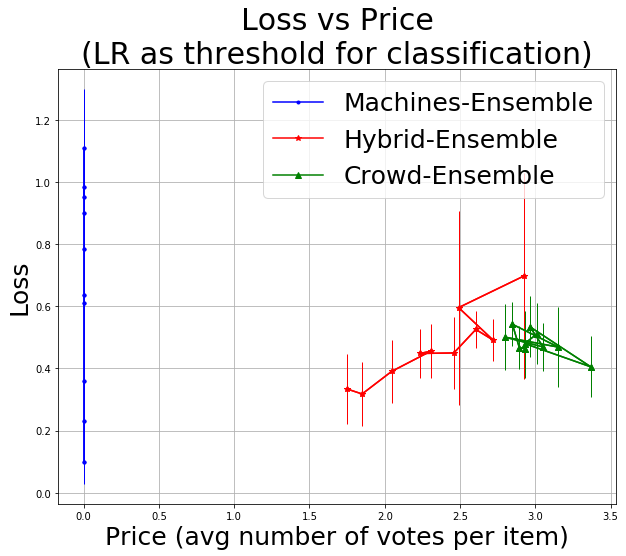

In [16]:
data = pd.read_csv('../output/data/fig5_lr_as_thrs.csv')
title = 'Loss vs Price\n(LR as threshold for classification)'

plot_chart(data, title)

# 8. Chart: (Vary machine_selection_confidence)

machine_selec_conf in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


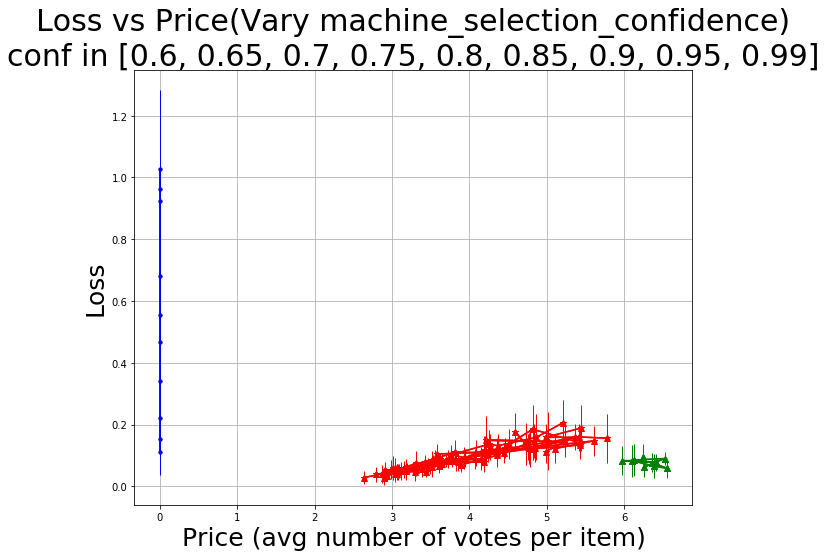

In [22]:
data = pd.read_csv('../output/data/fig6_machine_selec_conf.csv')

fig, ax = plt.subplots(figsize=(10,8))
colors = ['blue', 'blue', 'green', 'green']
algos = ['Machines-Ensemble', 'Crowd-Ensemble']
ax.set_color_cycle(colors)

markers = ['.', '^']
def plot_alg(data, alg, marker):
    y = data.loc[(data['alg'] == alg) & (data['machine_selec_conf'] == 0.95)]['loss_mean'].values
    x = data.loc[(data['alg'] == alg) & (data['machine_selec_conf'] == 0.95)]['price_mean'].values
    err = data.loc[(data['alg'] == alg) & (data['machine_selec_conf'] == 0.95)]['loss_std'].values
    plt.plot(x, y, label=alg, marker=marker)
    plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1)

for alg, marker in zip(algos, markers):
    plot_alg(data, alg, marker)

machine_selec_conf = data['machine_selec_conf'].unique()
ax.set_color_cycle(['red'])
for conf in machine_selec_conf:
    y = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['machine_selec_conf'] == conf)]['loss_mean'].values
    x = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['machine_selec_conf'] == conf)]['price_mean'].values
    err = data.loc[(data['alg'] == 'Hybrid-Ensemble') & (data['machine_selec_conf'] == conf)]['loss_std'].values
    plt.plot(x, y, label=alg, marker='*')
    plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1)

plt.title('Loss vs Price(Vary machine_selection_confidence)\nconf in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]', size=30)
plt.xlabel('Price (avg number of votes per item)', size=25)
plt.ylabel('Loss', size=25)
# plt.legend(fontsize = 25)
plt.grid()

# 9. Chart: (use experts for classification, 50 iterations for averaging)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


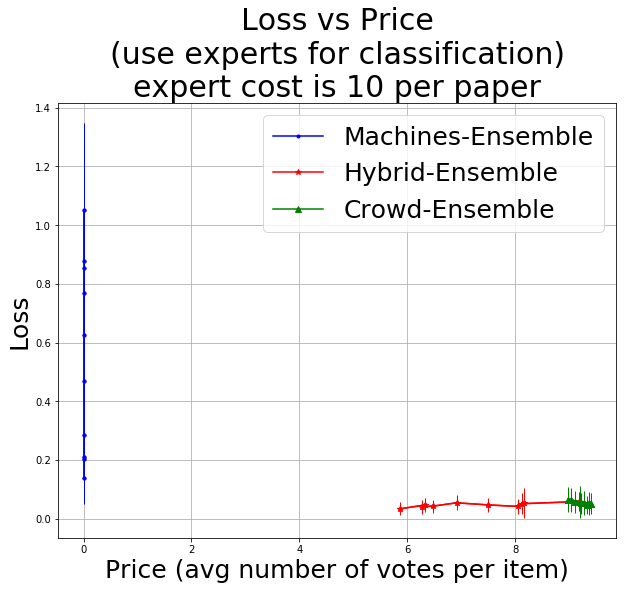

In [32]:
data = pd.read_csv('../output/data/fig7_use_experts_50itr.csv')
title = 'Loss vs Price\n(use experts for classification)\nexpert cost is 10 per paper'

plot_chart(data, title)

